### preparing voice data for voice unit
* use cv-corpus-19.0-2024-09-13 english collection
* there are total of 2,459,129 clips, validated 1,822,496, of which, we use the clips listed in train.tsv, 
* train.tsv contained 1,116,234 clips, 38172 speakers (client_id)
* remove those speakers (client_id) that gender = 'NA', OR have any down_votes > 0
* as long as the speaker has one clip that received a down_vote, even those speakers who may have other clips without down_votes, i.e., a clip with down_votes = 0, they will be removed from our analysis
* in addition, for the speakers groups younger than eighties, remove those speakers with less than 6 clips recorded
* this reduced data volume from the 96GB at download to about 650 MB, number of speakers from 38172 to 1209, clips from 1,116,234 to 16,710

* once we selected the voice clips, we produced the feature sets for use clustering and classification in later lectures. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cv_list = pd.read_csv('/Users/yingli/Development/TopicsInDataScience/cv-corpus-19.0-2024-09-13/en/train.tsv', 
            sep='\t', dtype = {'age':str, 'gender':str}
        )
cv_list.shape

/var/folders/j8/w88cxj05115byx3n9mnk572w0000gn/T/ipykernel_21976/3749810545.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  cv_list = pd.read_csv('/Users/yingli/Development/TopicsInDataScience/cv-corpus-19.0-2024-09-13/en/train.tsv',


(1116234, 13)

In [3]:
cv_list.nunique()

client_id            38172
path               1116234
sentence_id        1116234
sentence           1116234
sentence_domain          6
up_votes                33
down_votes              12
age                      9
gender                   2
accents                432
variant                  0
locale                   1
segment                  0
dtype: int64

In [4]:
cv_list.sentence_domain.isna().sum()

1116224

In [5]:
cv_list.count()

client_id          1116234
path               1116234
sentence_id        1116234
sentence           1116234
sentence_domain         10
up_votes           1116234
down_votes         1116234
age                 794896
gender              769730
accents             689194
variant                  0
locale             1116234
segment                  0
dtype: int64

We can see that columns variant, segment are entirely NA, and sentence_domain has only 10 non NA rows. We also see age, gender, accents have lots NAs too (up to 1/3). we will want to drop the columns of "variant", "segment", "sentence_domain", and "locale" (all locales are "en")

We then drop the rows with NA in age or gender.

In [6]:
cv_list.drop(labels = ["variant", "segment", "sentence_domain","locale"],axis =1,inplace=True)
cv_list.dropna(subset = ["age","gender"], inplace = True)

In [7]:
cv_list.count()

client_id      766049
path           766049
sentence_id    766049
sentence       766049
up_votes       766049
down_votes     766049
age            766049
gender         766049
accents        601578
dtype: int64

We can see the NA percentage in "accents" is much reduced.

In [8]:
cv_list.nunique()

client_id       13225
path           766049
sentence_id    766049
sentence       766049
up_votes           31
down_votes         11
age                 9
gender              2
accents           294
dtype: int64

We now remove speakers who have down_votes > 0, and those younger groups who has less than 6 clips. 

In [9]:
client_id_0 = cv_list.client_id.drop_duplicates()
remove_1 = cv_list.query("down_votes > 0").client_id.drop_duplicates()
client_id_1 = set(client_id_0).difference(remove_1)

cv_list_1 = cv_list[cv_list["client_id"].isin(client_id_1)]
cv_list_1.groupby(["age","gender"]).nunique()

client_id  path  sentence_id  sentence  up_votes  \
age       gender                                                              
eighties  female_feminine          1     2            2         2         2   
          male_masculine           4    25           25        25         3   
fifties   female_feminine         82   546          546       546         6   
          male_masculine         180  1146         1146      1146         8   
fourties  female_feminine        105   715          715       715         5   
          male_masculine         359  2564         2564      2564        10   
nineties  male_masculine           1    89           89        89         3   
seventies female_feminine         22   226          226       226         5   
          male_masculine          41   464          464       464         4   
sixties   female_feminine         59   655          655       655         6   
          male_masculine         108   747          747       747         6   
teens     female_feminine        100   902          902       902         7   
          male_masculine         328  2462         2462      2462         9   
thirties  female_feminine        162  1345         1345      1345         6   
          male_masculine         635  4609         4609      4609         9   
twenties  female_feminine        250  1683         1683      1683         8   
          male_masculine        1101  6625         6625      6625         9   

                           down_votes  accents  
age       gender                                
eighties  female_feminine           1        1  
          male_masculine            1        2  
fifties   female_feminine           1       11  
          male_masculine            1       21  
fourties  female_feminine           1        8  
          male_masculine            1       24  
nineties  male_masculine            1        1  
seventies female_feminine           1        4  
          male_masculine            1        8  
sixties   female_feminine           1        9  
          male_masculine            1       13  
teens     female_feminine           1       15  
          male_masculine            1       31  
thirties  female_feminine           1       20  
          male_masculine            1       33  
twenties  female_feminine           1       27  
          male_masculine            1       48

In [10]:
client_attribute = cv_list.groupby(["client_id","age","gender"]).agg(
    up_vote_max = ('up_votes', 'max'),
    up_vote_min = ('up_votes', 'min'),
    down_vote_max = ('down_votes', 'max'),
    down_vote_min = ('down_votes', 'min'),
    num_up_vote = ('up_votes', 'nunique'),
    num_down_vote = ('down_votes', 'nunique'),
    num_clip = ('path', 'count')
).reset_index()

In [11]:
remove_2 = client_attribute.query("age != 'eighties' and age !='seventies' and num_clip <= 5").client_id.drop_duplicates()
client_id_2 = set(client_id_1).difference(remove_2)
cv_list_2 = cv_list_1[cv_list_1["client_id"].isin(client_id_2)]
cv_list_1.groupby(["age","gender"]).nunique()

client_id  path  sentence_id  sentence  up_votes  \
age       gender                                                              
eighties  female_feminine          1     2            2         2         2   
          male_masculine           4    25           25        25         3   
fifties   female_feminine         82   546          546       546         6   
          male_masculine         180  1146         1146      1146         8   
fourties  female_feminine        105   715          715       715         5   
          male_masculine         359  2564         2564      2564        10   
nineties  male_masculine           1    89           89        89         3   
seventies female_feminine         22   226          226       226         5   
          male_masculine          41   464          464       464         4   
sixties   female_feminine         59   655          655       655         6   
          male_masculine         108   747          747       747         6   
teens     female_feminine        100   902          902       902         7   
          male_masculine         328  2462         2462      2462         9   
thirties  female_feminine        162  1345         1345      1345         6   
          male_masculine         635  4609         4609      4609         9   
twenties  female_feminine        250  1683         1683      1683         8   
          male_masculine        1101  6625         6625      6625         9   

                           down_votes  accents  
age       gender                                
eighties  female_feminine           1        1  
          male_masculine            1        2  
fifties   female_feminine           1       11  
          male_masculine            1       21  
fourties  female_feminine           1        8  
          male_masculine            1       24  
nineties  male_masculine            1        1  
seventies female_feminine           1        4  
          male_masculine            1        8  
sixties   female_feminine           1        9  
          male_masculine            1       13  
teens     female_feminine           1       15  
          male_masculine            1       31  
thirties  female_feminine           1       20  
          male_masculine            1       33  
twenties  female_feminine           1       27  
          male_masculine            1       48

In [12]:
cv_list.shape,cv_list_1.shape,cv_list_2.shape

((766049, 9), (24805, 9), (16710, 9))

In [13]:
cv_list_2.groupby(["client_id", "age","gender"]).agg(
    clip_num = ('path', 'nunique')
).reset_index().sort_values(by="clip_num", ascending=False)

,client_id,age,gender,clip_num
596,81516963704c4bbecc85d974b769a0ed4871707afd30d3...,seventies,male_masculine,167
199,27c2bcb5074395819c7360c4a8711977e6258352ab80dc...,thirties,male_masculine,136
743,a33afddc9bfab2d5710efcb0a162d6e8e2ed092be3a59e...,thirties,male_masculine,128
834,b398dbe61e96ad337be48fb6c492f59722416ddc8a4e49...,fourties,male_masculine,110
291,3f8c120d55b1e8fd45b4588a8e981e61040eda6923828a...,teens,male_masculine,104
...,...,...,...,...
825,b0fe0110971f06d859b66254cf6e7c73dbe1d484dbc5eb...,seventies,male_masculine,1
99,126c21d77a97a689f22cd7ac2dfb289acbed11e1d6f640...,seventies,male_masculine,1
985,d40ae1a4614a236ffd9ccd55fd0af7eed9974b13756d18...,seventies,male_masculine,1
994,d5ed376f34311e655c695f1bbb2eb909375b2a34d3257e...,seventies,female_feminine,1


In [14]:
cv_list_2.query("age == 'twenties' and gender == 'male_masculine'").groupby("client_id").up_votes.max().sort_values(ascending=False)


client_id
a4dee56c5d0080d9bd025a6ad971f28b49710868a5fa99d06284726cfc65b900a5283005be067dc972aea46f7c70897aa90ffd63c816654cb6878851b9913e95    12
92e1021e9cd72243f1e2ce97b95164a08b52d6aca3c110a50123110745dff4e9cba1da81ba6ca4647543cd6304164f84a6efec6dd48e77dbd742c2b0763438ea    12
c9a2e07dc4078d1015f314c38abedc2f7e161920f263fbe0e529b817f3453bb18e25bc07363cb952125807fa35732098ba43a5f6923407acfb49de0f67844523    12
83b4ab66b20c62a78b229de0ba22e57e26aecfd7004794d3b8bd314039a01b3982076e028e504c258f99c2a5806556a5e52723a8c31310ca45c56e81eef01bc4    10
92344e32d0afb87ae4193ac96cbf7f2ce6e675f0254970d69a9c5e76e891fe32280575606484a220876d9c879a1db91cbeb22179f05c0a4c20164e900b46de45     9
                                                                                                                                    ..
6a0fb1baaf8d0c53c51f3b934143a3ddfe60422c47112e9fdd2b166259b982ca73daab1a30fbd46701cb28fd1922093e80a3ae3b6e56a3c6202cc216f815b511     2
6a272b94687d650ca8cdf48fb6cf781244f9436f4c634

In [15]:
cv_list_2.nunique()

client_id       1209
path           16710
sentence_id    16710
sentence       16710
up_votes          13
down_votes         1
age                9
gender             2
accents           91
dtype: int64

We can check the sentence lengths.

In [16]:
cv_list_2.sentence.apply(lambda x: len(x)).describe()

count    16710.000000
mean        61.586655
std         19.187179
min          5.000000
25%         48.000000
50%         62.000000
75%         76.000000
max        169.000000
Name: sentence, dtype: float64

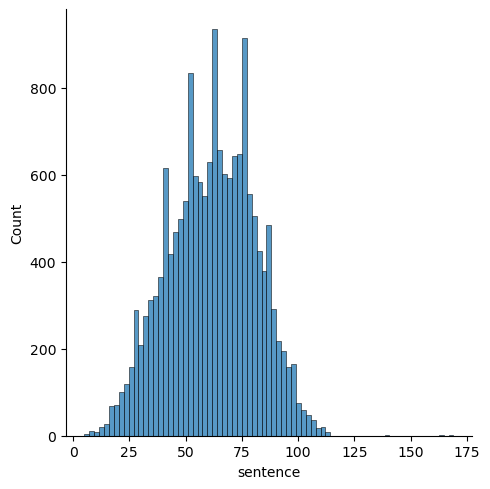

In [17]:
import seaborn as sns
sns.displot(cv_list_2.sentence.apply(lambda x: len(x)).sort_values(axis=0,ascending=False))

In [18]:
cv_list_2.groupby("client_id").count().reset_index().sort_values( by = "up_votes", ascending = False).head(20)

,client_id,path,sentence_id,sentence,up_votes,down_votes,age,gender,accents
594,81516963704c4bbecc85d974b769a0ed4871707afd30d3...,167,167,167,167,167,167,167,167
199,27c2bcb5074395819c7360c4a8711977e6258352ab80dc...,136,136,136,136,136,136,136,136
741,a33afddc9bfab2d5710efcb0a162d6e8e2ed092be3a59e...,128,128,128,128,128,128,128,128
832,b398dbe61e96ad337be48fb6c492f59722416ddc8a4e49...,110,110,110,110,110,110,110,110
290,3f8c120d55b1e8fd45b4588a8e981e61040eda6923828a...,104,104,104,104,104,104,104,104
1010,da2e78e2fce4b63cdcee0c45eb6fc7402c1b22d1d888ef...,97,97,97,97,97,97,97,97
768,a832c76013f233e214baeefa9691b681581684f542fc8a...,89,89,89,89,89,89,89,89
558,791801414acea16f3d95f0beca20f2e70c55c744930baa...,87,87,87,87,87,87,87,87
514,6fe1feeb3c42bfda34efad60fbec53c1ce669c0b3592e0...,79,79,79,79,79,79,79,79
861,b9423ded6c5670ebd6fdd41739b45bacd3f178c9fd5d02...,77,77,77,77,77,77,77,77


In [19]:
cv_list_2.nunique()

client_id       1209
path           16710
sentence_id    16710
sentence       16710
up_votes          13
down_votes         1
age                9
gender             2
accents           91
dtype: int64

In [20]:
cv_list_2.path.to_csv("voice_clip_path_no_header.csv", header=False,index=False)
cv_list_2.to_csv("voice_clip_meta_data.csv", header=True,index=False)

### prepare the feature data frame

In [21]:
import librosa
from scipy import stats

def get_stats(x):
    if np.any(x) == False:
        return np.nan,np.nan,np.nan,np.nan,np.nan, np.nan, np.nan
    else:
        return x.mean(),x.std(),x.var(),x.min(), x.max(), stats.skew(x),stats.kurtosis(x) 
        #for variance, np.var uses ddof=0 as default, whereas scipy.stats use ddof=1 

This below cell reads each auido file and check the sampling rate, the results shows that there are different sampling rates used in the common voice data collection. So we may want to read in the original sampling rate, or we may read in the same sampling rate but be aware of the potential impact of different sampling rates in the original audio files. 

In [22]:
data_dir = '/Users/yingli/Development/TopicsInDataScience/cv-corpus-19.0-2024-09-13/en/clips/'
voice_clip_meta_data = pd.read_csv("voice_clip_meta_data.csv")
sr_list = []
for filename in voice_clip_meta_data.path:
    x, sr = librosa.load(data_dir +filename, sr=None) # take the mp3's native sample rate
    sr_list.append(sr)
pd.Series(sr_list).value_counts()


32000    9416
48000    7209
44100      85
Name: count, dtype: int64

In [23]:
data_dir = '/Users/yingli/Development/TopicsInDataScience/cv-corpus-19.0-2024-09-13/en/clips/'
voice_clip_meta_data = pd.read_csv("voice_clip_meta_data.csv")
voice_feature = voice_clip_meta_data

x_list = []
sr_list = []
len_list = []
f0_list = []
zcr_list = []
mfcc_list = []
for filename in voice_feature.path:
    x, sr = librosa.load(data_dir +filename, sr=None) # take the mp3's native sample rate
    x_list.append(x.shape[0])
    sr_list.append(sr)
    len_list.append(x.shape[0]/sr)
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, sr=sr,fmin=50, fmax=1000, fill_na=None)
    f0_stats = get_stats(f0[voiced_flag])
    f0_list.append(f0_stats)
    zcr = librosa.feature.zero_crossing_rate(y=x)
    zcr_stats = get_stats(zcr[0,:]) # zero_crossing_rate returns a 2d array 
    zcr_list.append(zcr_stats)
    mfcc = librosa.feature.mfcc(y=x,sr=sr,n_mfcc=25,dct_type=2) #n_mel was defaulted to 128 for mel filter bands
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_list.append(mfcc_mean)
stats_name = ['mean','std','var','min','max','skew','kurtosis']
f0_feature = pd.DataFrame(np.stack(f0_list), columns=["f0_" + sn for sn in stats_name])
zcr_feature = pd.DataFrame(np.stack(zcr_list), columns=["zcr_" + sn for sn in stats_name])
mfcc_array = np.stack(mfcc_list,axis=0)
mfcc_feature = pd.DataFrame(mfcc_array, columns=["mfcc_"+str(n).rjust(2, "0") for n in range(mfcc_array.shape[1])])
voice_feature["len_in_second"] = len_list
voice_feature["sampling_rate"] = sr_list
voice_feature["array_size"] = x_list
voice_feature_new = pd.concat([f0_feature, zcr_feature, mfcc_feature,voice_feature], axis=1)
voice_feature_new.to_csv("voice_feature_20241022.csv", index=None)

We can copy out the only selected voice clips, set aside for our study. This is much smaller sized data, can put on drive and copy without waiting for long time. The command to use:


for FILE in $(cat ./voice_clip_path_no_header.csv) 

do 

cp ${FILE} /Users/yingli/Development/TopicsInDataScience/voice_clips


done

